<a href="https://www.kaggle.com/code/mohamedtahaouf/tiktok-data?scriptVersionId=193216445" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a href="https://www.kaggle.com/code/mohamedtahaouf/tiktok-data?scriptVersionId=192986809" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# TikTok Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#ML1">EDA.</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset contains information on TikTok users' reports of videos and comments that include user claims. These reports flag content for moderator review, generating a significant volume of user reports that need timely attention.

> TikTok is developing a predictive model to determine whether a video contains a claim or offers an opinion. A successful prediction model will help reduce the backlog of user reports and enable more efficient prioritization.

> This dataset is intended for exploratory data analysis (EDA), statistical analysis, and predictive modeling. It has been created for pedagogical purposes and aims to facilitate learning and research in data analysis and machine learning
            

<a id='wrangling'></a>
## Data Wrangling


> In this section we will clarify the data to analyze it and answer the questions easily.

In [1]:
# Import the laibraies.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,roc_auc_score
from sklearn.model_selection import train_test_split,KFold
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler,OneHotEncoder
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb

In [2]:
# We have got an extened data
df=pd.read_csv('/kaggle/input/dataset-from-tiktok/tiktok_dataset.csv')

In [3]:
df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [4]:
des,text = df.describe() , df.describe(include="O")
des

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [5]:
text

,claim_status,video_transcription_text,verified_status,author_ban_status
count,19084,19084,19382,19382
unique,2,19012,2,3
top,claim,a friend read in the media a claim that badmi...,not verified,active
freq,9608,2,18142,15663


In [6]:
# df.loc[19084:19184,"claim_status"] = "opinion"
# df.loc[19185:,"claim_status"] = "claim"
# df[df["claim_status"].isna()]
# columns_to_fill = ["video_view_count", "video_like_count", "video_share_count", "video_download_count", "video_comment_count"]

# for column in columns_to_fill:
#     df[column].fillna(df[column].mean(), inplace=True)

In [7]:
df=df.drop(columns=['#'])#,"video_transcription_text"
df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19084 entries, 0 to 19083
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   claim_status              19084 non-null  object 
 1   video_id                  19084 non-null  int64  
 2   video_duration_sec        19084 non-null  int64  
 3   video_transcription_text  19084 non-null  object 
 4   verified_status           19084 non-null  object 
 5   author_ban_status         19084 non-null  object 
 6   video_view_count          19084 non-null  float64
 7   video_like_count          19084 non-null  float64
 8   video_share_count         19084 non-null  float64
 9   video_download_count      19084 non-null  float64
 10  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.7+ MB


In [9]:
df.isna().sum()

claim_status                0
video_id                    0
video_duration_sec          0
video_transcription_text    0
verified_status             0
author_ban_status           0
video_view_count            0
video_like_count            0
video_share_count           0
video_download_count        0
video_comment_count         0
dtype: int64

In [10]:
df.describe()

,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,1.908400e+04,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,5.624840e+09,32.423811,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,2.537030e+09,16.226470,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,3.425100e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,5.609500e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,7.840823e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [11]:
# describe the descriptive & continuousvalues
df.describe(include="O")

,claim_status,video_transcription_text,verified_status,author_ban_status
count,19084,19084,19084,19084
unique,2,19012,2,3
top,claim,a friend read in the media a claim that badmi...,not verified,active
freq,9608,2,17884,15383


In [12]:
df.drop_duplicates(df,inplace=True)
df.duplicated().sum()

0

<a id='ML1'></a>
## EDA (Exploratory Data Analysis)

In [13]:
from IPython.display import display

print("The highest video views:")
display(df[df["video_view_count"] == df["video_view_count"].max()])

print("The most shared video:")
display(df[df["video_share_count"] == df["video_share_count"].max()])

print("The most like video")
display(df[df["video_like_count"] == df["video_like_count"].max()])

The highest video views:


,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
9273,claim,5491664721,16,i discovered on the radio a claim that 1920 wa...,not verified,active,999817.0,385415.0,63849.0,5330.0,2475.0


The most shared video:


,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
2446,claim,9715423156,46,a friend read on an internet forum a claim th...,not verified,active,997365.0,657830.0,256130.0,4908.0,904.0


The most like video


,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
2446,claim,9715423156,46,a friend read on an internet forum a claim th...,not verified,active,997365.0,657830.0,256130.0,4908.0,904.0


Text(0.5, 1.0, 'author_ban_status')

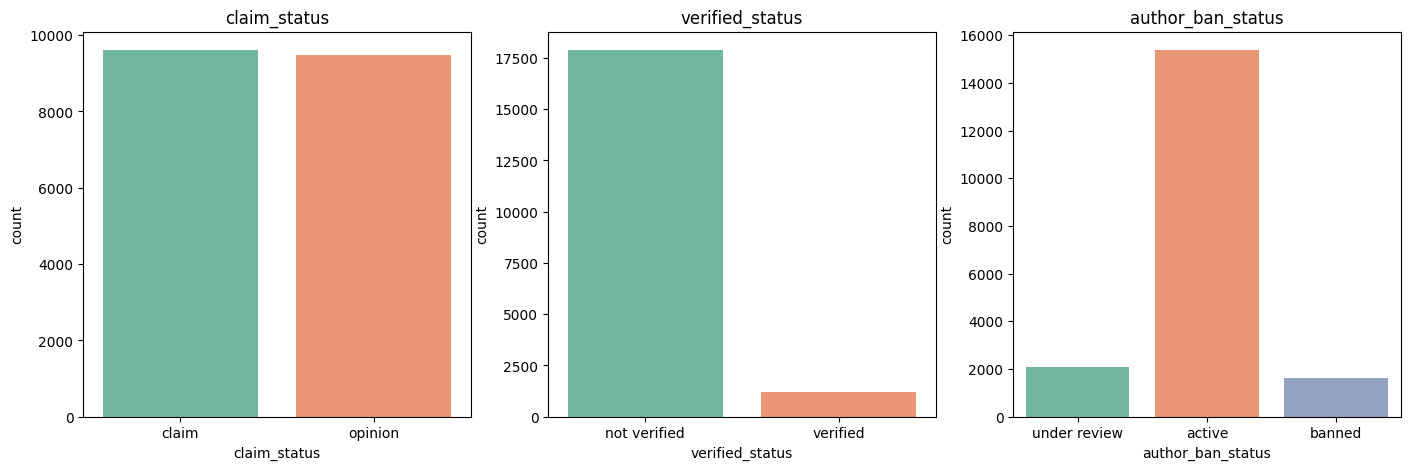

In [14]:
fig, axs = plt.subplots(ncols=3, figsize=(17,5))

sns.countplot(data=df,x="claim_status", palette="Set2",ax=axs[0])
axs[0].set_title('claim_status')

sns.countplot(data=df,x="verified_status", palette="Set2",ax=axs[1])
axs[1].set_title('verified_status')

sns.countplot(data=df,x="author_ban_status", palette="Set2",ax=axs[2])
axs[2].set_title('author_ban_status')

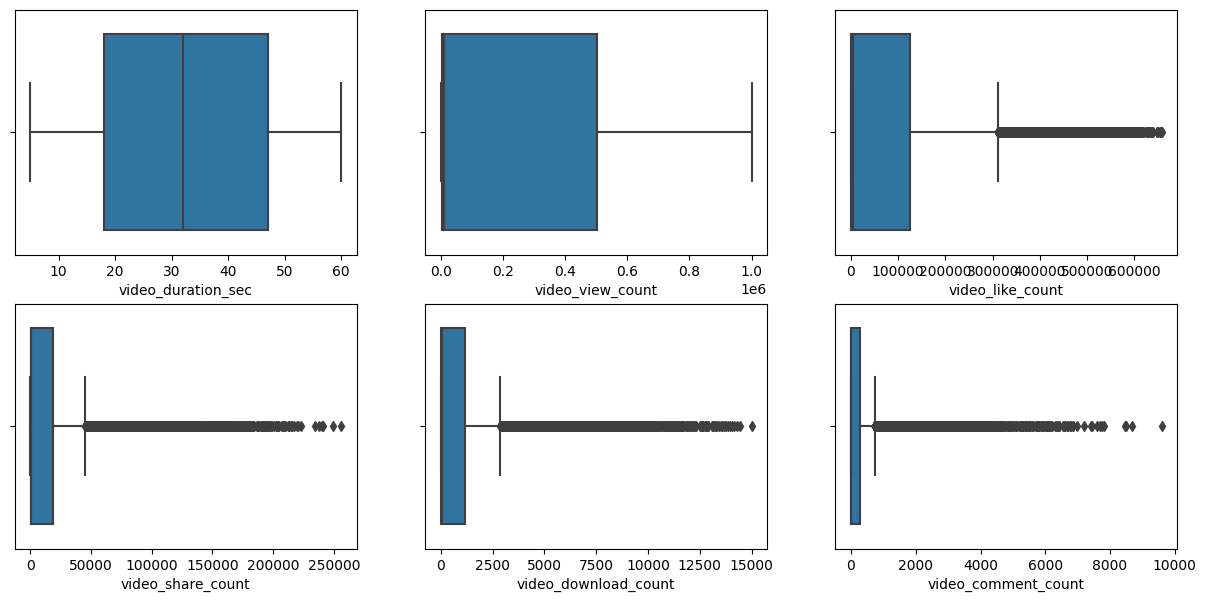

In [15]:
# Figure out the outlier using boxplot
col = ["video_duration_sec","video_view_count","video_like_count","video_share_count","video_download_count","video_comment_count"]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 7))
axes = axes.flatten()

for i, column in enumerate(col):
    sns.boxplot(data=df,x= column,ax=axes[i])

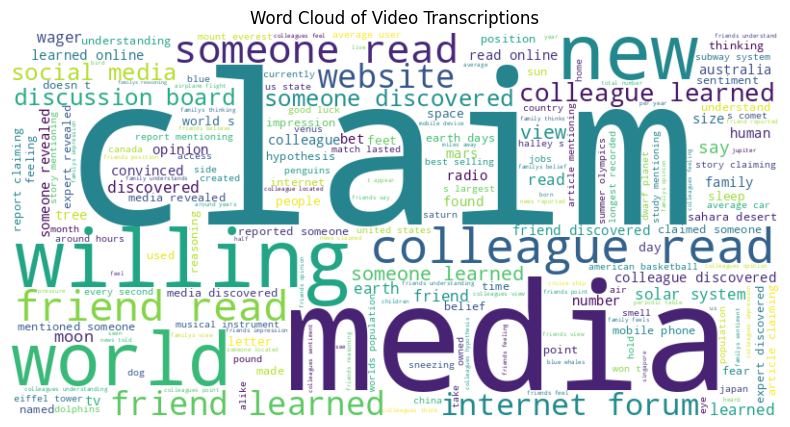

In [16]:
# Inspired by mosheng_fan
# Appear the most words used in video_transcription_text 

import string
from wordcloud import WordCloud
from textblob import TextBlob


# Removing punctuation from a string
text = ' '.join(df['video_transcription_text'])

# Remove punctuation
text = text.translate(str.maketrans('', '', string.punctuation))

# Convert text to lowercase
text = text.lower()

# Generate the word cloud with the cleaned text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Video Transcriptions')
plt.show()
